In [6]:
import numpy as np 
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

import missingno as msno #visualises missing values
from wordcloud import WordCloud #to find the most frequent words 
from collections import Counter 


In [7]:
#data that is being scraped from source 
scrape = "https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv"

### Pre-Processing(data cleaning):
- loading
- peeking
- general info

In [8]:
#loading data 
df = pd.read_csv(scrape)

/var/folders/0m/sz8j8cn52wl69dlv6r81z4f00000gn/T/ipykernel_20925/1039849880.py:2: DtypeWarning: Columns (12,14,18,21,24,29,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(scrape)


In [9]:
df.head()

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
0,N1,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-04-29,2022-05-06,...,https://www.gov.uk/government/news/monkeypox-c...,https://www.who.int/emergencies/disease-outbre...,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
1,N2,confirmed,Guy's and St Thomas Hospital London,London,England,GBR,NaN,NaN,2022-05-05,2022-05-12,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
2,N3,confirmed,London,London,England,GBR,NaN,NaN,2022-04-30,2022-05-13,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
3,N4,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18
4,N5,confirmed,London,London,England,GBR,NaN,male,NaN,2022-05-15,...,https://www.gov.uk/government/news/monkeypox-c...,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-18,NaN,2022-05-18


In [10]:
df.tail() #addressed results a few lines down

,ID,Status,Location,City,Country,Country_ISO3,Age,Gender,Date_onset,Date_confirmation,...,Source,Source_II,Source_III,Source_IV,Source_V,Source_VI,Source_VII,Date_entry,Date_death,Date_last_modified
44552,E2915,suspected,Cross River,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19
44553,E2916,suspected,Oyo,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19
44554,E2917,suspected,Kano,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19
44555,E2918,confirmed,Nasarawa,NaN,Nigeria,NGA,NaN,NaN,NaN,2022-08-07,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19
44556,E2919,suspected,Niger,NaN,Nigeria,NGA,NaN,NaN,NaN,NaN,...,https://ncdc.gov.ng/themes/common/files/sitrep...,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-19,NaN,2022-08-19


In [11]:
#number of countries with monkeypox cases
len(df["Country"].unique())

115

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44557 entries, 0 to 44556
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       44557 non-null  object 
 1   Status                   44557 non-null  object 
 2   Location                 31947 non-null  object 
 3   City                     1223 non-null   object 
 4   Country                  44557 non-null  object 
 5   Country_ISO3             44557 non-null  object 
 6   Age                      2683 non-null   object 
 7   Gender                   2211 non-null   object 
 8   Date_onset               57 non-null     object 
 9   Date_confirmation        41593 non-null  object 
 10  Symptoms                 200 non-null    object 
 11  Hospitalised (Y/N/NA)    299 non-null    object 
 12  Date_hospitalisation     32 non-null     object 
 13  Isolated (Y/N/NA)        418 non-null    object 
 14  Date_isolation        

In [13]:
#to see the number of missing values for the columns in the dataset

df.isnull().sum() 

ID                             0
Status                         0
Location                   12610
City                       43334
Country                        0
Country_ISO3                   0
Age                        41874
Gender                     42346
Date_onset                 44500
Date_confirmation           2964
Symptoms                   44357
Hospitalised (Y/N/NA)      44258
Date_hospitalisation       44525
Isolated (Y/N/NA)          44139
Date_isolation             44541
Outcome                    44468
Contact_comment            44466
Contact_ID                 44530
Contact_location           44551
Travel_history (Y/N/NA)    44218
Travel_history_entry       44521
Travel_history_start       44549
Travel_history_location    44450
Travel_history_country     44463
Genomics_Metadata          44533
Confirmation_method        44458
Source                         0
Source_II                  37765
Source_III                 43724
Source_IV                  44505
Source_V  

In [14]:
#further breakdown of missing values and their proportionality

total = df.isnull().sum().sort_values(ascending=False) #my isnull function loops through each row in a single column and return 1 for missing data & 0 for non-missing 
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #finds the percentage of these missing values that each colum adds up to
missing_values = pd.concat([total, percentage], axis=1, keys=["Total", "Percentage"])
missing_values.head(50)

,Total,Percentage
Source_VI,44557,1.000000
Source_VII,44557,1.000000
Source_V,44557,1.000000
Contact_location,44551,0.999865
Travel_history_start,44549,0.999820
Date_isolation,44541,0.999641
Genomics_Metadata,44533,0.999461
Contact_ID,44530,0.999394
Date_hospitalisation,44525,0.999282
Travel_history_entry,44521,0.999192


In [15]:
#BASED ON THE OUTPUT OF THE CODE ABOVE I NEED TO OMIT THE USELESS COLUMNS WITH MISSING VALUES SUCH AS THE "SOURCE COLUMNS", BUT I CANNOT DECIDE WHAT ROUTE I WANT TO TAKE AT THIS TIME SO ILL COME BACK

##### A few values will have to be omitted due to their lack of importance in regards to the integrity of my dataset. I will conduct deeper cleaning

### Exploratory Data Analysis (EDA)

In [16]:
#to show the top 15 countries by monkeypox cases in desc order
top = df["Country"].value_counts().nlargest(n=15)

In [17]:
#function that plots the number of monkeypox cases per country (matplotlib & seaborn) (non interactive)
def countrycases():
    plt.figure(figsize=(50,8))
    sns.countplot(x="Country", data=df)
    plt.xticks(rotation=90)
    plt.show()

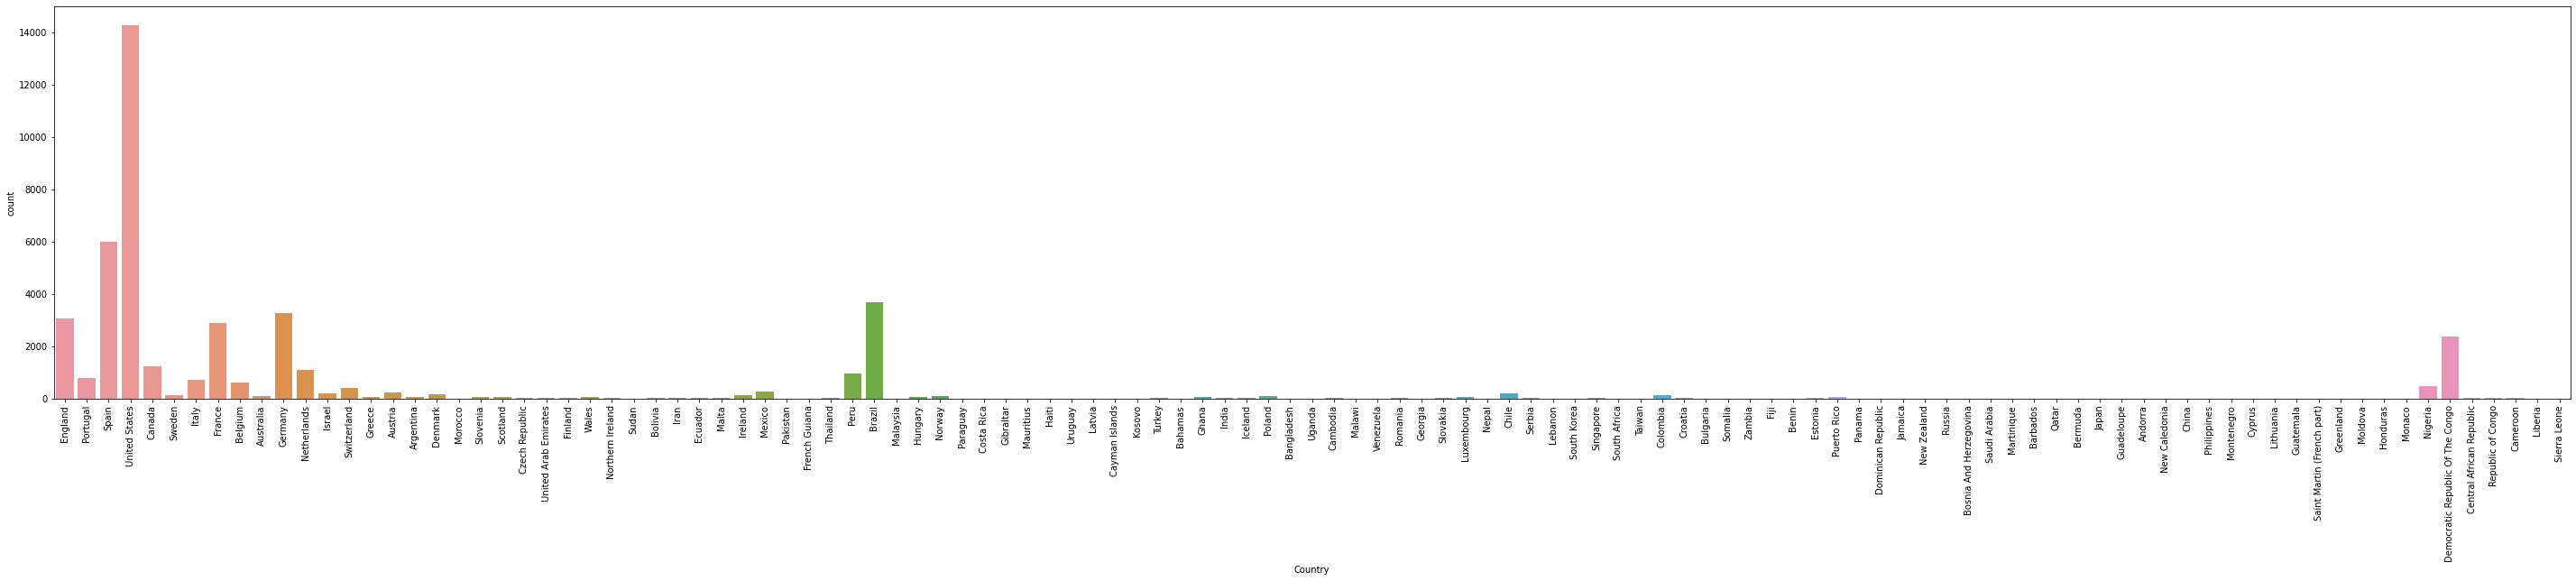

In [18]:
countrycases()

In [19]:
#lists the top 15 cities with monkeypox cases ranked in desc order
citycases = df["City"].value_counts().nlargest(n=15)

<AxesSubplot:xlabel='Status', ylabel='count'>

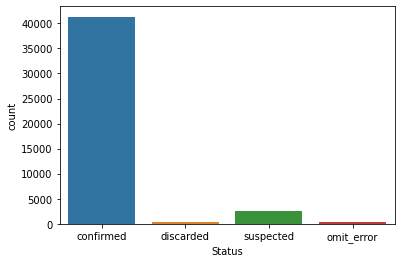

In [20]:
#distribution based on status (total)
sns.countplot(x="Status",data=df)

In [21]:
#the 5 most common symptoms

simp = ' '.join(df["Symptoms"].fillna("0").to_list())
freq = Counter(simp.split())
freq.most_common(5)




[('0', 44357), ('lesions', 77), ('genital', 53), ('skin', 44), ('fever,', 36)]

### Features

In [22]:
#should contain your correlation heatmap, need to make sure that it is formatted correctly
#need to clean data more in order to find proper correlation

df.corr()

,Contact_ID,Source_V,Source_VI,Source_VII
Contact_ID,1.0,NaN,NaN,NaN
Source_V,NaN,NaN,NaN,NaN
Source_VI,NaN,NaN,NaN,NaN
Source_VII,NaN,NaN,NaN,NaN
